# 62 Extracting contour lines from raster

The following notebook illustrates how to extract contour lines from a raster utilizing ```Rasterio```, ```Shapely``` and ```Geopands```.

<img src="../images/tutorial62_cover.png"> 

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [12]:
import gemgis as gg

file_path = 'data/62_extracting_contour_lines_from_raster/'

In [13]:
gg.download_gemgis_data.download_tutorial_data(filename="62_extracting_contour_lines_from_raster.zip", dirpath=file_path)

## Loading the data

For this tutorial a SRTM DEM with a resolution of 30 m showing the area around Aachen and the High Fens - Eifel is used. SRTM data is provided by the LP DAAC (https://lpdaac.usgs.gov/product_search/?collections=MEaSUREs+SRTM&view=list&sort=title), which is responsible for the distribution of NASA MEaSUREs data, and can be downloaded for free from different website or through different GIS plugins.

As the `GemGIS` function `extract_contour_lines_from_raster` is able to work with `.tif` files, `raster.io` objects and `np.ndarrays`, multiple ways of loading the data will be shown below. 

#### 1) Loading the data as a raster.io object

In [30]:
import rasterio

raster =  rasterio.open(file_path + 'N50E006.tif')
raster.read(1)

array([[ 80,  81,  82, ...,  46,  46,  45],
       [ 81,  81,  81, ...,  45,  45,  46],
       [ 80,  80,  81, ...,  47,  47,  47],
       ...,
       [399, 400, 402, ..., 197, 196, 194],
       [395, 395, 396, ..., 197, 196, 194],
       [391, 391, 390, ..., 196, 195, 194]], dtype=int16)

If the raster is loaded as a raster.io object, the extent and CRS can be extractet easily. 

In [31]:
raster_extent = raster.bounds
raster_extent

BoundingBox(left=5.999861111, bottom=49.999861111, right=7.000138889, top=51.000138889)

In [32]:
raster_crs = raster.crs
raster_crs

CRS.from_epsg(4326)

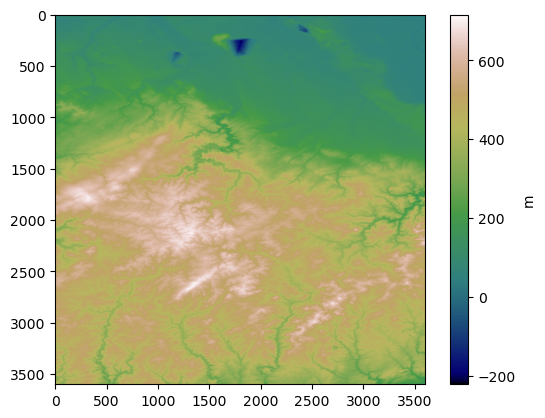

In [33]:
import matplotlib.pyplot as plt

im = plt.imshow(raster.read(1), cmap ='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('m')

#### 2) Loading the data as an np.ndarray

In [27]:
import numpy as np

raster = np.load(file_path + 'raster_array.npy')

#### Plotting the raster

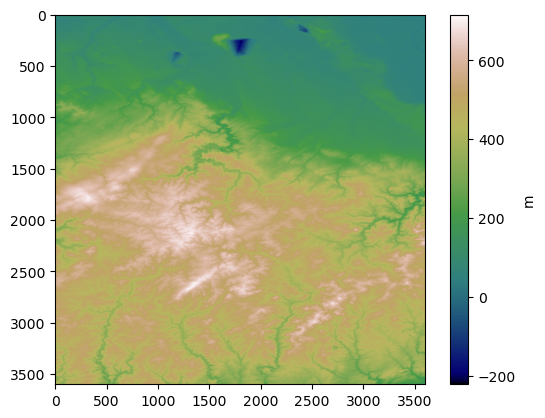

In [19]:
import matplotlib.pyplot as plt

im = plt.imshow(raster, cmap ='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('m')

## Extracting Contour Lines

For extracting the contour lines from the raster, it is necessary to provide the raster data as well as the extent from which the contour lines are supposed to extractet from, the crs of the raster and the interval with which contour lines are supposed to be extractet.

For the chosen example for this tutorial, the extent will be set to the SRTM DEM extent, CRS to EPSG:4326 and the interval will be set to 100 meters.

#### If raster was loaded as raster.io object

In [37]:
gdf_lines = gg.raster.extract_contour_lines_from_raster(raster= raster, 
                                     interval = 100)

#### If raster is present as .tif file

In [39]:
gdf_lines = gg.raster.extract_contour_lines_from_raster(raster= file_path + 'N50E006.tif', 
                                     interval = 100)

#### If raster is present as ndarray

In [28]:
gdf_lines = gg.raster.extract_contour_lines_from_raster(raster= file_path + 'N50E006.tif',
                                     extent=(5.99, 7.00, 49.99, 51.0),
                                     target_crs='EPSG:4326',
                                     interval = 100)

## Plotting Contour Lines

With the contours extractet they can now be easily plotted 

Text(0.5, 1.05, 'Extractect Contour Lines (100m Intervals)')

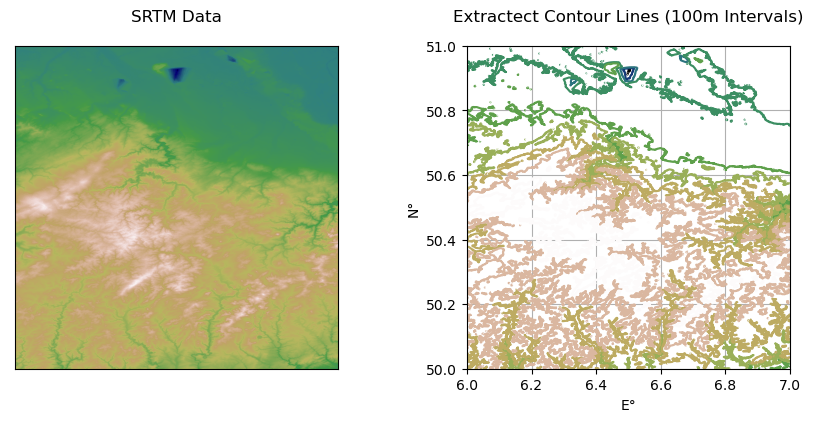

In [46]:
fig, ax = plt.subplots(1,2, figsize = (10,10))
fig.subplots_adjust(wspace = (0.4))

ax[0].imshow(raster.read(1), cmap ='gist_earth')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("SRTM Data", y= 1.05)

gdf_lines.plot(column = 'Z', ax = ax[1], cmap ='gist_earth')
ax[1].set_aspect("equal")
ax[1].set_xlabel("E°")
ax[1].set_ylabel("N°")
ax[1].grid()
ax[1].set_xlim(6, 7)
ax[1].set_ylim(50,51)
ax[1].set_title("Extractect Contour Lines (100m Intervals)", y= 1.05)